### Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns


### Iniciando com a importação dos dados do meu github


In [15]:
dados_filmes = pd.read_csv('https://raw.githubusercontent.com/fogacagabriel/Analise-de-dados---Filmes/main/arquivofilmes.csv')
#Uma breve visualização das primeiras cinco linhas, para assegurar que o arquivo foi corretamente importado
dados_filmes.head(5)

,Unnamed: 0,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,actor_id,actor_name,actor_order,actor_gender
0,0,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,11768,Patricia Tallman,0,1
1,1,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,19384,Tony Todd,1,2
2,2,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,27736,Tom Towles,2,2
3,3,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,90653,McKee Anderson,3,0
4,4,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,27737,Bill Moseley,4,2


### Agora, usamos o método info() para ter uma visão geral sobre o DataFrame gerado acima

In [16]:
dados_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165130 entries, 0 to 165129
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          165130 non-null  int64  
 1   movie_id            165130 non-null  int64  
 2   movie_title         165130 non-null  object 
 3   movie_popularity    165130 non-null  float64
 4   movie_release_date  165130 non-null  object 
 5   movie_budget        165130 non-null  int64  
 6   movie_revenue       165130 non-null  int64  
 7   actor_id            165130 non-null  int64  
 8   actor_name          165130 non-null  object 
 9   actor_order         165130 non-null  int64  
 10  actor_gender        165130 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 13.9+ MB


In [17]:
#Percebe-se a presença de uma coluna genérica 'Unnamed: 0, irrelevante para a análise a ser realizada, logo, vou excluí-la
dados_filmes.drop(axis=1, columns = 'Unnamed: 0', inplace = True)

In [18]:
#Verifico novamente para ver como está
dados_filmes.head(5)

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,actor_id,actor_name,actor_order,actor_gender
0,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,11768,Patricia Tallman,0,1
1,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,19384,Tony Todd,1,2
2,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,27736,Tom Towles,2,2
3,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,90653,McKee Anderson,3,0
4,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,27737,Bill Moseley,4,2


### Agora, de modo a verificar a tendência dos dados, verifico a quantidade de valores únicos

In [19]:
dados_filmes.nunique()

movie_id               4960
movie_title            4911
movie_popularity       4499
movie_release_date     3321
movie_budget            524
movie_revenue          4769
actor_id              83607
actor_name            82770
actor_order             249
actor_gender              4
dtype: int64

### Um pouco de análise exploratória, com o exemplo do filme Veloses e Furiosos 7 (Em ing: 'Furious 7')

In [23]:
dados_filmes[dados_filmes['movie_title'] == 'Furious 7']  #Adicionamos todas as informações do DataFrame referentes ao filme


,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,actor_id,actor_name,actor_order,actor_gender
127694,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,12835,Vin Diesel,0,2
127695,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,8167,Paul Walker,1,2
127696,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,18918,Dwayne Johnson,2,2
127697,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,17647,Michelle Rodriguez,3,1
127698,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,8169,Tyrese Gibson,4,2
127699,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,8171,Ludacris,5,2
127700,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,22123,Jordana Brewster,6,1
127701,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,938,Djimon Hounsou,7,2
127702,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,57207,Tony Jaa,8,2
127703,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,997887,Ronda Rousey,9,1


In [41]:
#Separando os primeiros 5 atores, ou os "lead actors"
lead_actors = dados_filmes[(dados_filmes['movie_title']=='Furious 7') & (dados_filmes['actor_order']<5)]
lead_actors

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,actor_id,actor_name,actor_order,actor_gender
127694,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,12835,Vin Diesel,0,2
127695,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,8167,Paul Walker,1,2
127696,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,18918,Dwayne Johnson,2,2
127697,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,17647,Michelle Rodriguez,3,1
127698,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,8169,Tyrese Gibson,4,2


### Continuação da análise, para tirar outras informações úteis

In [42]:
#Convertendo o movie_release_date de object para datetime
dados_filmes['movie_release_date'] = pd.to_datetime(dados_filmes['movie_release_date'])

In [43]:
#Verifico a conversão pela função info
dados_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165130 entries, 0 to 165129
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   movie_id            165130 non-null  int64         
 1   movie_title         165130 non-null  object        
 2   movie_popularity    165130 non-null  float64       
 3   movie_release_date  165130 non-null  datetime64[ns]
 4   movie_budget        165130 non-null  int64         
 5   movie_revenue       165130 non-null  int64         
 6   actor_id            165130 non-null  int64         
 7   actor_name          165130 non-null  object        
 8   actor_order         165130 non-null  int64         
 9   actor_gender        165130 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 12.6+ MB


In [48]:
#Abrangência das datas dos filmes que o DataFrame abrange
dados_filmes['movie_release_date'].min()

Timestamp('1990-01-18 00:00:00')

In [47]:
dados_filmes['movie_release_date'].max()

Timestamp('2021-06-15 00:00:00')

In [49]:
#Crio uma nova coluna para armazenar apenas o ano de lançamento de cada filme
dados_filmes['movie_release_year'] = dados_filmes['movie_release_date'].dt.year

In [50]:
#Verificando o resultado
dados_filmes.head(5)

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,actor_id,actor_name,actor_order,actor_gender,movie_release_year
0,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,11768,Patricia Tallman,0,1,1990
1,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,19384,Tony Todd,1,2,1990
2,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,27736,Tom Towles,2,2,1990
3,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,90653,McKee Anderson,3,0,1990
4,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,27737,Bill Moseley,4,2,1990


In [51]:
#10 maiores filmes por renda gerada (revenue)
dados_filmes.nlargest(10, 'movie_revenue')

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,actor_id,actor_name,actor_order,actor_gender,movie_release_year
157607,299534,Avengers: Endgame,256.12,2019-04-24,356000000,2797800564,3223,Robert Downey Jr.,0,2,2019
157608,299534,Avengers: Endgame,256.12,2019-04-24,356000000,2797800564,16828,Chris Evans,1,2,2019
157609,299534,Avengers: Endgame,256.12,2019-04-24,356000000,2797800564,103,Mark Ruffalo,2,2,2019
157610,299534,Avengers: Endgame,256.12,2019-04-24,356000000,2797800564,74568,Chris Hemsworth,3,2,2019
157611,299534,Avengers: Endgame,256.12,2019-04-24,356000000,2797800564,1245,Scarlett Johansson,4,1,2019
157612,299534,Avengers: Endgame,256.12,2019-04-24,356000000,2797800564,17604,Jeremy Renner,5,2,2019
157613,299534,Avengers: Endgame,256.12,2019-04-24,356000000,2797800564,1896,Don Cheadle,6,2,2019
157614,299534,Avengers: Endgame,256.12,2019-04-24,356000000,2797800564,22226,Paul Rudd,7,2,2019
157615,299534,Avengers: Endgame,256.12,2019-04-24,356000000,2797800564,172069,Chadwick Boseman,8,2,2019
157616,299534,Avengers: Endgame,256.12,2019-04-24,356000000,2797800564,71580,Benedict Cumberbatch,9,2,2019


In [53]:
#10 maiores filmes pelo lucro gerado (revenue subtraido do budget), chamaremos de 'movie_profit'
dados_filmes['movie_profit'] = dados_filmes['movie_revenue'] - dados_filmes['movie_budget']


In [54]:
dados_filmes.nlargest(10, 'movie_profit')

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,actor_id,actor_name,actor_order,actor_gender,movie_release_year,movie_profit
84658,19995,Avatar,99.254,2009-12-10,237000000,2787965087,65731,Sam Worthington,0,2,2009,2550965087
84659,19995,Avatar,99.254,2009-12-10,237000000,2787965087,8691,Zoe Saldana,1,1,2009,2550965087
84660,19995,Avatar,99.254,2009-12-10,237000000,2787965087,10205,Sigourney Weaver,2,1,2009,2550965087
84661,19995,Avatar,99.254,2009-12-10,237000000,2787965087,32747,Stephen Lang,3,2,2009,2550965087
84662,19995,Avatar,99.254,2009-12-10,237000000,2787965087,17647,Michelle Rodriguez,4,1,2009,2550965087
84663,19995,Avatar,99.254,2009-12-10,237000000,2787965087,1771,Giovanni Ribisi,5,2,2009,2550965087
84664,19995,Avatar,99.254,2009-12-10,237000000,2787965087,59231,Joel David Moore,6,2,2009,2550965087
84665,19995,Avatar,99.254,2009-12-10,237000000,2787965087,30485,CCH Pounder,7,1,2009,2550965087
84666,19995,Avatar,99.254,2009-12-10,237000000,2787965087,15853,Wes Studi,8,2,2009,2550965087
84667,19995,Avatar,99.254,2009-12-10,237000000,2787965087,10964,Laz Alonso,9,2,2009,2550965087


### Criar novo DataFrame, contendo apenas as informações referentes ao filmes em si, sem contar os atores

In [56]:
dados_filmes.columns

Index(['movie_id', 'movie_title', 'movie_popularity', 'movie_release_date',
       'movie_budget', 'movie_revenue', 'actor_id', 'actor_name',
       'actor_order', 'actor_gender', 'movie_release_year', 'movie_profit'],
      dtype='object')

In [58]:
dados_somente_filmes = dados_filmes[['movie_id','movie_title','movie_popularity','movie_release_date','movie_budget','movie_revenue','movie_profit','movie_release_year']]


,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,movie_profit,movie_release_year
0,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,1635247,1990
1,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,1635247,1990
2,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,1635247,1990
3,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,1635247,1990
4,19185,Night of the Living Dead,33.5,1990-10-19,4200000,5835247,1635247,1990
...,...,...,...,...,...,...,...,...
165125,804568,Fruits of Labor,0.6,2021-03-05,400,1,-399,2021
165126,800234,Lunch,0.6,2021-02-03,27,47,20,2021
165127,800234,Lunch,0.6,2021-02-03,27,47,20,2021
165128,799413,This Could Be You,0.6,2021-02-21,1000,1000000,999000,2021


In [62]:
#Removemos as colunas duplicadas e substituimos no DF original
dados_somente_filmes = dados_somente_filmes.drop_duplicates()
dados_somente_filmes

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,movie_profit,movie_release_year
0,19185,Night of the Living Dead,33.500,1990-10-19,4200000,5835247,1635247,1990
29,11186,Child's Play 2,35.438,1990-11-09,13000000,35763605,22763605,1990
41,169,Predator 2,33.004,1990-11-20,35000000,57120318,22120318,1990
97,114,Pretty Woman,27.188,1990-03-23,14000000,463000000,449000000,1990
164,769,GoodFellas,21.805,1990-09-12,25000000,46835000,21835000,1990
...,...,...,...,...,...,...,...,...
165103,817809,Come Forth Reverend,0.600,2021-01-29,2,28,26,2021
165114,809904,Old Home on the Corner,0.600,2021-03-03,100,250,150,2021
165118,804568,Fruits of Labor,0.600,2021-03-05,400,1,-399,2021
165126,800234,Lunch,0.600,2021-02-03,27,47,20,2021


### Quais são os dez maiores filmes, por revenue?

In [63]:
dados_somente_filmes.nlargest(10, columns='movie_revenue')

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,movie_profit,movie_release_year
157607,299534,Avengers: Endgame,256.120,2019-04-24,356000000,2797800564,2441800564,2019
84658,19995,Avatar,99.254,2009-12-10,237000000,2787965087,2550965087,2009
20529,597,Titanic,65.321,1997-11-18,200000000,2187463944,1987463944,1997
128452,140607,Star Wars: The Force Awakens,45.539,2015-12-15,245000000,2068223624,1823223624,2015
150288,299536,Avengers: Infinity War,299.129,2018-04-25,300000000,2046239637,1746239637,2018
127971,135397,Jurassic World,56.180,2015-06-06,150000000,1671713208,1521713208,2015
159201,420818,The Lion King,93.845,2019-07-12,260000000,1656943394,1396943394,2019
105732,24428,The Avengers,147.417,2012-04-25,220000000,1518815515,1298815515,2012
127694,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,1325047671,2015
158982,330457,Frozen II,121.513,2019-11-20,150000000,1450026933,1300026933,2019


### Quais são os 10 maiores filmes por lucro?

In [64]:
dados_somente_filmes.nlargest(10, columns='movie_profit')

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,movie_profit,movie_release_year
84658,19995,Avatar,99.254,2009-12-10,237000000,2787965087,2550965087,2009
157607,299534,Avengers: Endgame,256.120,2019-04-24,356000000,2797800564,2441800564,2019
20529,597,Titanic,65.321,1997-11-18,200000000,2187463944,1987463944,1997
128452,140607,Star Wars: The Force Awakens,45.539,2015-12-15,245000000,2068223624,1823223624,2015
150288,299536,Avengers: Infinity War,299.129,2018-04-25,300000000,2046239637,1746239637,2018
127971,135397,Jurassic World,56.180,2015-06-06,150000000,1671713208,1521713208,2015
159201,420818,The Lion King,93.845,2019-07-12,260000000,1656943394,1396943394,2019
127694,168259,Furious 7,88.169,2015-04-01,190000000,1515047671,1325047671,2015
158982,330457,Frozen II,121.513,2019-11-20,150000000,1450026933,1300026933,2019
105732,24428,The Avengers,147.417,2012-04-25,220000000,1518815515,1298815515,2012


### Filmes com maiores revenue por ano de lançamento

In [68]:
dados_somente_filmes = dados_somente_filmes.sort_values('movie_revenue', ascending=True)
dados_somente_filmes.groupby('movie_release_year').last()

#Conseguimos, assim, ordenar os filmes, por ano, e em cada ano, o maior revenue

,movie_id,movie_title,movie_popularity,movie_release_date,movie_budget,movie_revenue,movie_profit
movie_release_year,,,,,,,
1990,251,Ghost,21.626,1990-07-12,22000000,505000000,483000000
1991,280,Terminator 2: Judgment Day,36.576,1991-07-03,102000000,520000000,418000000
1992,812,Aladdin,50.326,1992-11-25,28000000,504050219,476050219
1993,329,Jurassic Park,20.859,1993-06-11,63000000,920100000,857100000
1994,8587,The Lion King,110.318,1994-06-23,45000000,763455561,718455561
1995,862,Toy Story,93.588,1995-10-30,30000000,373554033,343554033
1996,602,Independence Day,25.703,1996-06-25,75000000,817400891,742400891
1997,597,Titanic,65.321,1997-11-18,200000000,2187463944,1987463944
1998,95,Armageddon,26.152,1998-07-01,140000000,553799566,413799566


### Explorando algumas visualizações com o pacote seaborn

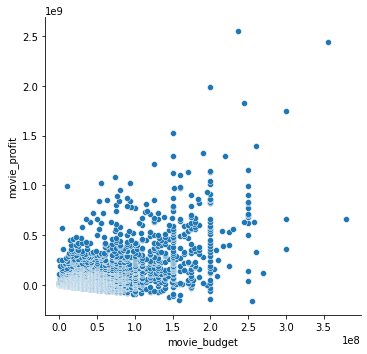

In [70]:
#Relação direta entre o valor gasto (budget) e o valor obtido de lucro em retorno (profit)
sns.relplot(data=dados_somente_filmes, x='movie_budget', y='movie_profit')

### Quais são os 10 atores que mais geraram revenue?

In [75]:
dados_filmes.groupby(['actor_id','actor_name'])['movie_revenue'].sum().nlargest(10)

actor_id  actor_name        
7624      Stan Lee              30513647785
2231      Samuel L. Jackson     26563727612
15831     Frank Welker          19127637846
84495     Jess Harnell          17965605716
1245      Scarlett Johansson    16423470258
11184     Warwick Davis         15904065259
21088     Alan Tudyk            15574055338
84493     Mickie McGowan        15396836203
7907      John Ratzenberger     14911889467
78317     Bob Bergen            14796273137
Name: movie_revenue, dtype: int64

### Filtrando, agora, somente pelos 'Leading Actors'

In [76]:
lead = dados_filmes['actor_order']<3

In [79]:
dados_filmes[lead].groupby(['actor_id','actor_name'])['movie_revenue'].sum().nlargest(10)

actor_id  actor_name       
3223      Robert Downey Jr.    14259306758
16828     Chris Evans          10004861753
31        Tom Hanks             9873387447
10990     Emma Watson           9669044684
18918     Dwayne Johnson        9331711173
2888      Will Smith            9323309724
85        Johnny Depp           9261465099
500       Tom Cruise            9091922150
1327      Ian McKellen          8031082088
10980     Daniel Radcliffe      7880940606
Name: movie_revenue, dtype: int64